This function generates a zoom plot with formatted dates. In the zoom plot, the month names are transformed into their first letters using a DateFormatter.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from matplotlib.dates import MonthLocator, YearLocator
from matplotlib.ticker import FuncFormatter
from matplotlib.transforms import Bbox
from matplotlib import pyplot
from matplotlib.dates import DateFormatter

In [2]:
def create_and_plot_data(df, x1, x2):
    # Set the dimensions and DPI for the figure
    width_in_inches = 8
    height_in_inches = 3.8
    dots_per_inch = 80

    # Define a function to get the full extent of an axes
    def full_extent(ax, pad=0.0):
        ax.figure.canvas.draw()
        items = ax.get_xticklabels() + ax.get_yticklabels()
        items += [ax, ax.title]
        bbox = Bbox.union([item.get_window_extent() for item in items])
        return bbox.expanded(1.0 + pad, 1.0 + pad)

    # Create a figure and an axis with the specified dimensions and DPI
    fig, ax = plt.subplots(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)

    # Scatter plot for "CV2014" data
    ax.scatter(df["Date"], df["col3"], label="col1", alpha=0.5, color='lightblue', lw=1, marker=',')

    # Scatter plot for "Mittheilungen" data
    ax.scatter(df["Date"], df["col1"], label="col2", alpha=0.3, color='orange', s=50, marker='o')

    # Scatter plot for "Source Books" data
    ax.scatter(df["Date"], df["col2"], label="col3", alpha=0.7, color='black', s=40, marker='*')

    # Add a legend to the center-left
    pyplot.legend(loc="center left", fontsize=12)

    # Create an inset axis for zooming in
    axins = zoomed_inset_axes(ax, 2, loc='lower left', bbox_to_anchor=(-200., 0, -100., -50), borderpad=3)

    # Set the YearLocator
    yloc = YearLocator()

    # Set the x and y limits for the inset axis
    axins.set_xlim(x1, x2)
    axins.set_ylim(10, 70)

    # Set major locator for the x-axis in the inset axis
    axins.xaxis.set_major_locator(yloc)

    # Scatter plot for "Mittheilungen" data in the inset axis
    axins.scatter(df["Date"], df["col1"], color='orange', s=80, marker='o', alpha=0.3)

    # Scatter plot for "Source Books" data in the inset axis
    axins.scatter(df["Date"], df["col2"], color='black', s=20, marker='*')

    # Set the DateFormatter for the x-axis in the inset axis
    month_fmt = DateFormatter('%b')

    def m_fmt(x, pos=None):
        return month_fmt(x)[0]

    axins.xaxis.set_major_locator(MonthLocator())
    axins.xaxis.set_major_formatter(FuncFormatter(m_fmt))
    axins.set_xlabel('Time (in months)', fontsize=15)
    axins.set_ylabel('Numbers', fontsize=15)

    # Mark the inset on the main axis
    mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.8")

    # Set the x-axis label for the main axis
    ax.set_xlabel('Time (in years)', fontsize=15)

    # Get the extent for the inset axis and transform it
    extent = full_extent(axins).transformed(fig.dpi_scale_trans.inverted())


In [3]:
#set the limits for zoom plot axes
x1= pd.to_datetime('1859-6-1')
x2= pd.to_datetime('1861-2-3')

In [4]:
df = pd.read_csv(r'C:\Users\ShreyaB\Documents\Mitteilungen\data\zoom_plot_example.csv')
df.Date = pd.to_datetime(df.Date)

In [5]:
df.tail()

,Date,col1,col2,col3
1255,1861-03-24,NaN,NaN,7.0
1256,1861-03-03,NaN,NaN,13.0
1257,1861-03-04,NaN,NaN,9.0
1258,1861-03-07,NaN,NaN,6.0
1259,1861-03-09,NaN,NaN,7.0


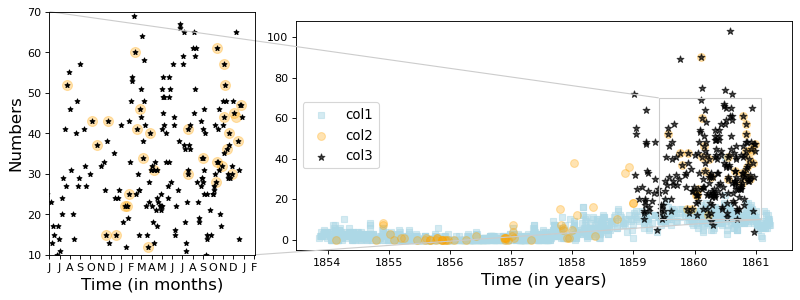

In [6]:
create_and_plot_data(df, x1, x2)